In [35]:
#-- Draw anomalies for 1997 and 1998
# idir = "/g/data/p66/ars599/mo_gc3/cq317/apm.pp/netCDF/20*.nc"
%matplotlib inline
import os
import pandas as pd
from netCDF4 import  num2date
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#from mpl_toolkits.basemap import Basemap

import os
os.getcwd()

%cd /home/599/ars599/Documents/a10/

import glob
print(glob.glob("/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-00/history/atm/netCDF/HI-00.pa-189[01]*mon.nc"))


/home/599/ars599/Documents/a10
['/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-00/history/atm/netCDF/HI-00.pa-189004_mon.nc', '/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-00/history/atm/netCDF/HI-00.pa-189006_mon.nc', '/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-00/history/atm/netCDF/HI-00.pa-189108_mon.nc', '/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-00/history/atm/netCDF/HI-00.pa-189103_mon.nc', '/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-00/history/atm/netCDF/HI-00.pa-189102_mon.nc', '/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-00/history/atm/netCDF/HI-00.pa-189011_mon.nc', '/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-00/history/atm/netCDF/HI-00.pa-189008_mon.nc', '/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-00/history/atm/netCDF/HI-00.pa-189112_mon.nc', '/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-00/history/atm/netCDF/HI-00.pa-189111_mon.nc', '/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-00/history/atm/netCDF/HI-00.pa-1891

In [36]:
import glob
import xarray as xr
from datetime import datetime

# List all matching files
files = glob.glob('/g/data/p66/ars599/archive/CMIP6/ACCESS-ESM1-5/HI-00/history/atm/netCDF/HI-00.pa-189[01]*mon.nc')

ds = xr.open_mfdataset(files, combine='nested', concat_dim=["time"])


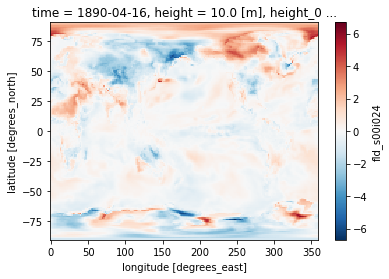

In [37]:
sst = ds.fld_s00i024
sst_clim = sst.groupby('time.month').mean(dim='time')
sst_anom = sst.groupby('time.month') - sst_clim

%matplotlib inline
sst_anom[0].plot()

In [52]:
x = list(range(1, 25))

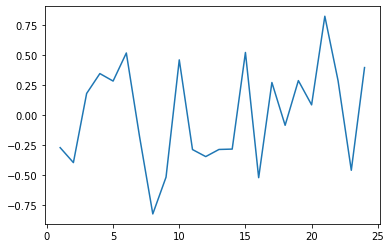

In [53]:
sst_ref = sst_anom.sel(lon=200, lat=0, method='nearest')
plt.plot(x,sst_ref)